In [56]:
#import libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as pyplot

In [57]:
# load data from the url 
ratings_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/teachingratings.csv'
ratings_df=pd.read_csv(ratings_url)

In [58]:
#print the five first rows of the data

ratings_df.head()

,minority,age,gender,credits,beauty,eval,division,native,tenure,students,allstudents,prof,PrimaryLast,vismin,female,single_credit,upper_division,English_speaker,tenured_prof
0,yes,36,female,more,0.289916,4.3,upper,yes,yes,24,43,1,0,1,1,0,1,1,1
1,yes,36,female,more,0.289916,3.7,upper,yes,yes,86,125,1,0,1,1,0,1,1,1
2,yes,36,female,more,0.289916,3.6,upper,yes,yes,76,125,1,0,1,1,0,1,1,1
3,yes,36,female,more,0.289916,4.4,upper,yes,yes,77,123,1,1,1,1,0,1,1,1
4,no,59,male,more,-0.737732,4.5,upper,yes,yes,17,20,2,0,0,0,0,1,1,1


In [59]:
#get information about each variable
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 19 columns):
minority           463 non-null object
age                463 non-null int64
gender             463 non-null object
credits            463 non-null object
beauty             463 non-null float64
eval               463 non-null float64
division           463 non-null object
native             463 non-null object
tenure             463 non-null object
students           463 non-null int64
allstudents        463 non-null int64
prof               463 non-null int64
PrimaryLast        463 non-null int64
vismin             463 non-null int64
female             463 non-null int64
single_credit      463 non-null int64
upper_division     463 non-null int64
English_speaker    463 non-null int64
tenured_prof       463 non-null int64
dtypes: float64(2), int64(11), object(6)
memory usage: 68.9+ KB


In [60]:
# number of rows and columns
ratings_df.shape 

(463, 19)

In [61]:
# Mean value for students
ratings_df['students'].mean()

36.62419006479482

In [62]:
#Median value for students
ratings_df['students'].median()

23.0

In [63]:
#Minimum value for students
ratings_df['students'].min()

5

In [64]:
#Maximu value for students
ratings_df['students'].max()

380

### Produce a descriptive statistics table

In [65]:
ratings_df.describe()

,age,beauty,eval,students,allstudents,prof,PrimaryLast,vismin,female,single_credit,upper_division,English_speaker,tenured_prof
count,463.000000,4.630000e+02,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000
mean,48.365011,6.271140e-08,3.998272,36.624190,55.177106,45.434125,0.203024,0.138229,0.421166,0.058315,0.660907,0.939525,0.779698
std,9.802742,7.886477e-01,0.554866,45.018481,75.072800,27.508902,0.402685,0.345513,0.494280,0.234592,0.473913,0.238623,0.414899
min,29.000000,-1.450494e+00,2.100000,5.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,-6.562689e-01,3.600000,15.000000,19.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,48.000000,-6.801430e-02,4.000000,23.000000,29.000000,44.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
75%,57.000000,5.456024e-01,4.400000,40.000000,60.000000,70.500000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,73.000000,1.970023e+00,5.000000,380.000000,581.000000,94.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [66]:
kalo = ratings_df.tenure == 'no'
print(kalo)

0      False
1      False
2      False
3      False
4      False
       ...  
458    False
459    False
460    False
461    False
462    False
Name: tenure, Length: 463, dtype: bool


(array([16., 51., 94., 66., 94., 42., 29., 40., 11., 20.]),
 array([-1.45049405, -1.10844234, -0.76639063, -0.42433892, -0.08228722,
         0.25976449,  0.6018162 ,  0.94386791,  1.28591962,  1.62797133,
         1.97002304]),
 <a list of 10 Patch objects>)

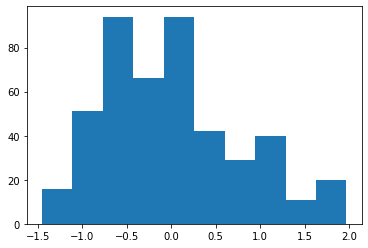

In [67]:
#Create a histogram of the beauty variable and briefly comment on the distribution of data

beauty = ratings_df['beauty']
pyplot.hist(beauty)

In [68]:
#Does average beauty score differ by gender? Produce the means and standard deviations for both male and female instructors
ratings_df.groupby('gender').agg({'beauty':['mean', 'std', 'var']}).reset_index()

gender    beauty                   
               mean      std       var
0  female  0.116109  0.81781  0.668813
1    male -0.084482  0.75713  0.573246

##### Calculate the percentage of males and females that are tenured professors. Will you say that tenure status differ by gender?

In [69]:
### First groupby to get the total sum

tenure_count = ratings_df[ratings_df.tenure == 'yes'].groupby('gender').agg({'tenure': 'count'}).reset_index()

In [70]:
# Find percentage
tenure_count['percentage'] = 100 * tenure_count.tenure/tenure_count.tenure.sum()
tenure_count

,gender,tenure,percentage
0,female,145,40.166205
1,male,216,59.833795


###### Additional questions 

In [71]:
#Question 1: Calculate the percentage of visible minorities are tenure professors. Will you say that tenure status differed if teacher was a visible minority?
tenure_count = ratings_df.groupby('minority').agg({'tenure': 'count'}).reset_index()

In [72]:
# Find the percentage
tenure_count['percentage'] = 100 * tenure_count.tenure/tenure_count.tenure.sum()

In [73]:
## group by tenureship and find the mean and standard deviation for each group
ratings_df.groupby('tenure').agg({'age':['mean', 'std']}).reset_index()

tenure        age           
               mean        std
0     no  50.186275   6.946372
1    yes  47.850416  10.420056

(array([41., 37., 58., 48., 75., 74., 53., 69.,  0.,  8.]),
 array([29. , 33.4, 37.8, 42.2, 46.6, 51. , 55.4, 59.8, 64.2, 68.6, 73. ]),
 <a list of 10 Patch objects>)

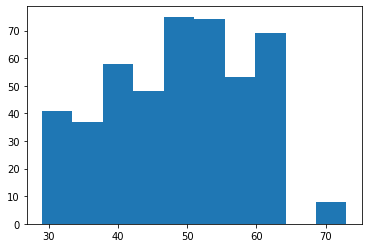

In [74]:
#histogramme fof the age 
pyplot.hist(ratings_df['age'])

In [75]:
#What is the Median evaluation score for tenured Professors?
ratings_df[ratings_df['tenure'] == 'yes']['eval'].median()

4.0